In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [26]:
data_train= pd.read_csv('churn-bigml-80.csv')
data_test= pd.read_csv('churn-bigml-20.csv')

In [27]:
data_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [28]:
data_test.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
666,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [29]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [30]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [31]:
# Encode categorical features
encoder = LabelEncoder()
data_test=data_test.drop(columns=['State'])
data_train =data_train.drop(columns=['State'])

data_train['International plan'] = encoder.fit_transform(data_train['International plan'])
data_train['Voice mail plan'] = encoder.fit_transform(data_train['Voice mail plan'])
data_train['Churn'] = encoder.fit_transform(data_train['Churn'])

data_test['International plan'] = encoder.fit_transform(data_test['International plan'])
data_test['Voice mail plan'] = encoder.fit_transform(data_test['Voice mail plan'])
data_test['Churn'] = encoder.fit_transform(data_test['Churn'])

In [32]:
 # Separate features (X) and target (y)
X_train = data_train.drop(columns=['Churn'])
y_train = data_train['Churn']
X_test = data_test.drop(columns=['Churn'])
y_test = data_test['Churn']

In [33]:
# Standardize the feature values for better SVM performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train,X_test)

In [36]:
X = data_train.drop(columns=['Churn']).copy()
y = data_train['Churn'].copy()

Accuracy: 91.30%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       572
           1       0.68      0.73      0.70        95

    accuracy                           0.91       667
   macro avg       0.82      0.84      0.83       667
weighted avg       0.92      0.91      0.91       667



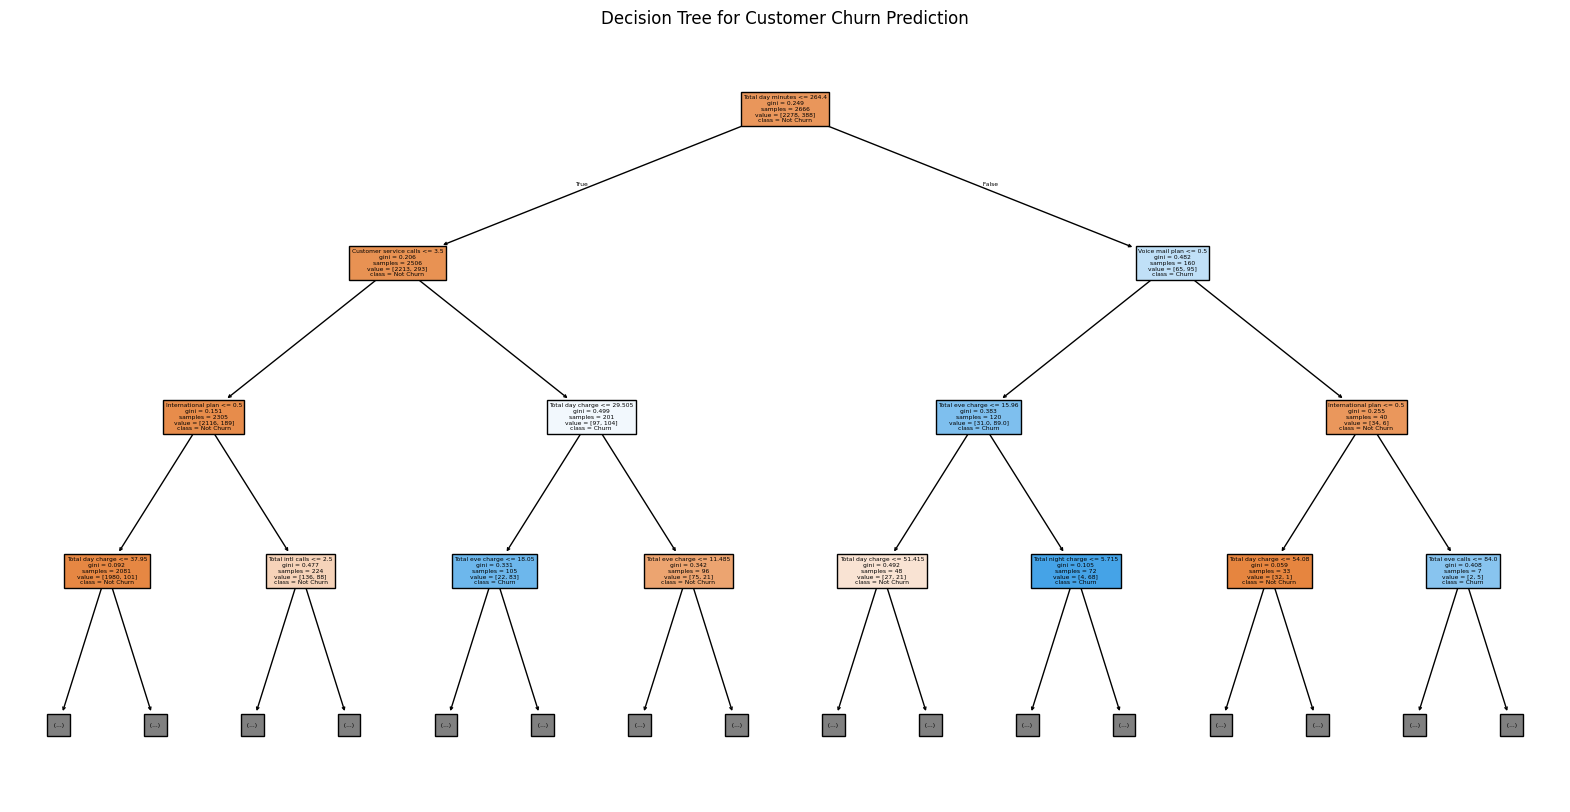

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict on the same dataset (if not splitting data)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model,max_depth=3, feature_names=X.columns, class_names=['Not Churn', 'Churn'], filled=True)
plt.title("Decision Tree for Customer Churn Prediction")
plt.show()

In [40]:
from sklearn.tree import DecisionTreeClassifier, export_text
tree_rules = export_text(model,max_depth=3, feature_names=X.columns)
# Print the rules
print(tree_rules)

|--- Total day minutes <= 264.40
|   |--- Customer service calls <= 3.50
|   |   |--- International plan <= 0.50
|   |   |   |--- Total day charge <= 37.95
|   |   |   |   |--- truncated branch of depth 17
|   |   |   |--- Total day charge >  37.95
|   |   |   |   |--- truncated branch of depth 13
|   |   |--- International plan >  0.50
|   |   |   |--- Total intl calls <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- Total intl calls >  2.50
|   |   |   |   |--- truncated branch of depth 6
|   |--- Customer service calls >  3.50
|   |   |--- Total day charge <= 29.50
|   |   |   |--- Total eve charge <= 18.05
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- Total eve charge >  18.05
|   |   |   |   |--- truncated branch of depth 6
|   |   |--- Total day charge >  29.50
|   |   |   |--- Total eve charge <= 11.48
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- Total eve charge >  11.48
|   |   |   |   |--- truncated branch of depth 7
|--- Total d

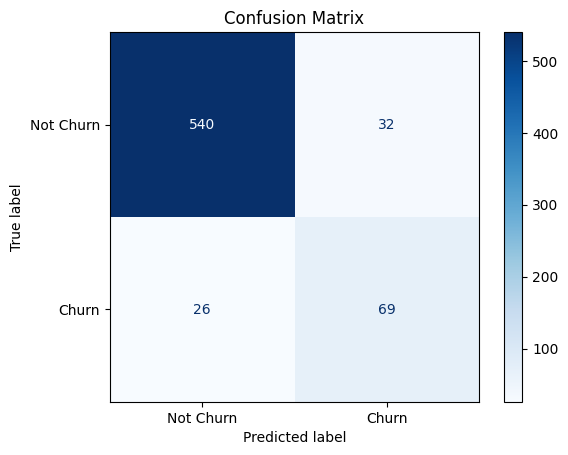

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churn", "Churn"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

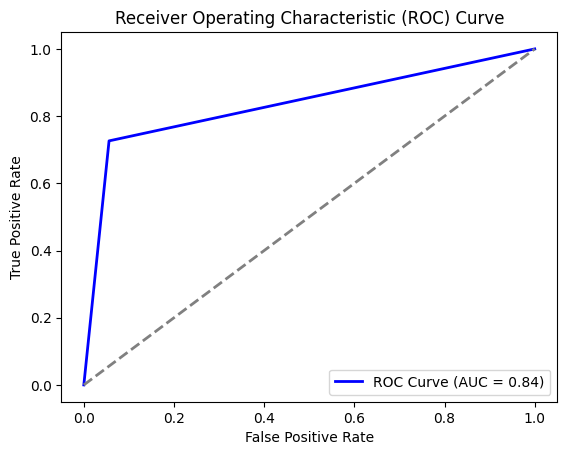

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve

y_true = data_test['Churn'].values  # Assuming 'Churn' is the target column in your test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class (Churn=1)
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [43]:
import pickle

In [46]:
import pickle
with open('Churn_Prediction.pkl','wb') as file:
  pickle.dump(model,file)